In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.evaluation.scripts import multi_system_evaluation, load_system

BASE_PATH = '/home/al826/rds/hpc-work/2023/comparative/generate/output_text'
system = 'flant5-xl'
mode = 'comp-probs'  #comp-probs, scoring
dataset='wi-dev'

prompt_nums = [1, 2, 3, 4]
if dataset == 'summeval':
    SCORES = ['coherency', 'consistency', 'fluency', 'relevance'] 
elif dataset == 'topicalchat':
    SCORES = ['coherency', 'continuity', 'engagingness', 'naturalness']
elif dataset == 'wi-dev':
    SCORES = ['overall'] 
    prompt_nums = [1, 2]

for score_type in SCORES:
    paths = [f"{BASE_PATH}/{dataset}/{system}/{score_type}/{mode}-{i}/outputs/combined.json" for i in prompt_nums] #[1, 2, 3, 4]
    out = multi_system_evaluation(paths, dataset=dataset, score_type=score_type, balanced=False)

    for k in out['means'].keys():
        #if k in ['sys_spear', 'spear']:
        if k in ['spear']:
            #print(f" & {out['means'][k]:.1f}\std{{{out['stds'][k]:.1f}}}", end='')
            print(f" & {out['means'][k]:.1f}", end='')

/rds/user/al826/hpc-work/envs/torch1.12/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 & 40.2

<AxesSubplot: xlabel='labels', ylabel='wins'>

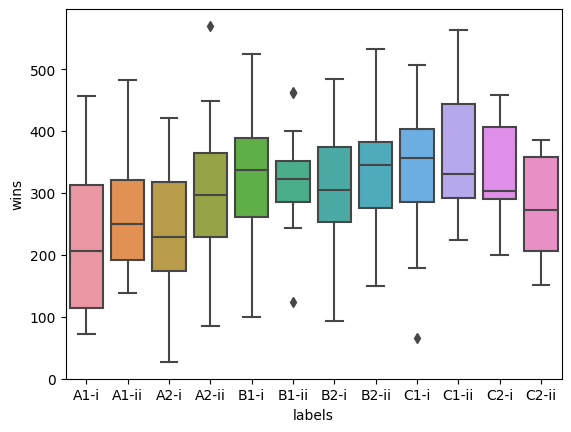

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from src.evaluation.scripts import load_system
from src.evaluation.eval_tools import Evaluater

i = 1
score_type = 'overall'


path = f"{BASE_PATH}/{dataset}/{system}/{score_type}/{mode}-{i}/outputs/combined.json"
sys = load_system(path)

ratings = sys.ratings
labels = Evaluater.load_ratings_labels(dataset=dataset, score_type=score_type)

#[['A', 'B', 'C'] ['1', '2'] ['i', 'ii']]
headers = itertools.product(*[['A', 'B', 'C'], ['1', '2'], ['-i', '-ii']])
headers = sorted([''.join(x) for x in headers])
lab_to_cefr = {k:v for k, v in enumerate(headers)}

y_preds = [v for k, v in sorted(ratings[0].items()) if k!=262]
y_labels = [lab_to_cefr[v] if v < 10 else lab_to_cefr[v-1] for k, v in sorted(labels[0].items()) if k!=262]

# sort into labels, to look at distributions
# out = defaultdict(list)
# for lab, pred in zip(y_labels, y_preds):
#     out[lab].append(pred)


df = pd.DataFrame({'labels':y_labels, 'wins':y_preds})
df = df.sort_values(by=['labels'])

sns.boxplot(data=df, x="labels", y="wins")
#plt.scatter(y_labels, y_preds)

In [4]:
from src.comparative.tools import comparatisons_to_tensors

sys = load_system(path)
C, M = comparatisons_to_tensors(sys.comparisons)
C = C[0]
M = M[0]

In [5]:
from src.comparative.optim import find_optimal_ranks

ranks = find_optimal_ranks(C, loss='consistent')

[4, 212, 275, 251, 24, 111, 30, 185, 180, 127, 254, 293, 47, 58, 202, 239, 277, 155, 60, 178, 171, 213, 115, 114, 201, 125, 145, 280, 3, 8, 176, 264, 214, 218, 222, 23, 210, 86, 45, 18, 256, 107, 174, 224, 134, 79, 131, 50, 34, 26, 1, 91, 161, 106, 71, 53, 82, 7, 152, 46, 257, 158, 294, 159, 168, 148, 282, 52, 76, 188, 109, 175, 183, 149, 199, 61, 221, 250, 189, 288, 144, 164, 104, 54, 126, 81, 273, 194, 110, 11, 219, 244, 13, 279, 49, 233, 130, 217, 73, 167, 205, 135, 297, 97, 271, 64, 172, 272, 245, 154, 236, 25, 129, 200, 102, 190, 9, 268, 37, 67, 42, 232, 253, 118, 187, 78, 15, 263, 29, 182, 77, 227, 123, 226, 98, 247, 112, 99, 74, 68, 140, 85, 248, 75, 27, 41, 84, 184, 93, 211, 283, 94, 290, 220, 287, 179, 48, 70, 193, 276, 266, 89, 147, 95, 195, 165, 92, 197, 235, 225, 101, 160, 62, 59, 90, 120, 10, 136, 19, 121, 237, 36, 117, 14, 105, 51, 231, 157, 230, 39, 163, 83, 284, 252, 150, 204, 265, 173, 32, 108, 261, 295, 31, 44, 55, 296, 40, 122, 133, 146, 246, 124, 35, 6, 258, 298, 16

[257, 110, 148, 122, 184, 268, 227, 209, 152, 254, 60, 4, 47, 199, 188, 169, 98, 158, 12, 48, 294, 131, 125, 217, 139, 74, 140, 247, 215, 290, 208, 79, 162, 56, 270, 242, 292, 179, 29, 83, 287, 124, 264, 243, 40, 259, 93, 116, 190, 277, 167, 214, 176, 216, 119, 87, 218, 165, 85, 234, 246, 21, 1, 13, 50, 53, 201, 121, 191, 160, 46, 92, 163, 170, 239, 120, 279, 284, 135, 210, 220, 144, 280, 142, 32, 168, 236, 195, 115, 102, 296, 18, 213, 45, 275, 238, 240, 262, 271, 23, 223, 82, 273, 33, 177, 105, 14, 127, 299, 230, 129, 225, 297, 202, 233, 224, 11, 143, 41, 9, 206, 114, 101, 106, 244, 39, 38, 180, 249, 212, 138, 258, 112, 130, 157, 78, 20, 263, 55, 75, 151, 2, 132, 251, 185, 146, 182, 69, 204, 94, 293, 281, 147, 113, 67, 61, 64, 166, 42, 126, 15, 8, 10, 171, 52, 203, 17, 49, 136, 219, 229, 186, 111, 221, 289, 187, 156, 54, 22, 248, 159, 37, 183, 34, 226, 172, 265, 149, 288, 81, 26, 117, 155, 90, 128, 255, 266, 77, 267, 100, 25, 59, 57, 228, 62, 91, 283, 192, 109, 295, 291, 63, 207, 198,

[168, 280, 220, 86, 159, 147, 175, 214, 67, 157, 82, 38, 270, 110, 195, 186, 263, 51, 191, 153, 68, 143, 250, 193, 127, 17, 246, 119, 172, 199, 200, 129, 141, 152, 136, 66, 289, 237, 115, 65, 256, 249, 259, 179, 228, 41, 35, 177, 55, 139, 54, 107, 23, 138, 251, 187, 1, 74, 48, 162, 239, 128, 58, 25, 131, 99, 112, 196, 98, 232, 224, 285, 11, 262, 6, 170, 178, 230, 50, 180, 34, 77, 231, 37, 146, 160, 292, 211, 75, 190, 247, 40, 294, 12, 69, 171, 201, 233, 149, 279, 185, 298, 154, 198, 276, 46, 272, 197, 47, 284, 260, 241, 261, 291, 189, 271, 123, 286, 216, 114, 236, 91, 126, 90, 31, 132, 4, 258, 137, 169, 269, 81, 255, 265, 53, 15, 130, 296, 290, 3, 92, 72, 103, 8, 118, 106, 109, 89, 9, 113, 94, 208, 148, 20, 140, 133, 105, 277, 225, 274, 27, 96, 158, 18, 182, 78, 164, 125, 88, 244, 100, 281, 156, 210, 39, 183, 102, 221, 71, 63, 287, 5, 167, 165, 295, 166, 97, 222, 288, 26, 212, 142, 192, 266, 243, 215, 235, 84, 70, 207, 275, 56, 101, 206, 254, 36, 83, 218, 124, 283, 151, 61, 24, 240, 16

[168, 298, 299, 86, 159, 147, 175, 214, 67, 157, 82, 38, 270, 110, 220, 195, 263, 51, 191, 153, 68, 143, 250, 193, 127, 17, 246, 119, 172, 199, 200, 129, 141, 152, 136, 66, 289, 186, 115, 65, 256, 237, 259, 179, 228, 41, 35, 177, 55, 139, 54, 107, 23, 138, 251, 249, 1, 74, 48, 162, 239, 128, 58, 25, 131, 99, 112, 187, 98, 196, 224, 232, 11, 262, 6, 170, 178, 285, 50, 180, 34, 77, 231, 37, 146, 160, 292, 211, 75, 190, 247, 40, 294, 12, 69, 171, 201, 230, 149, 233, 185, 280, 154, 198, 279, 46, 272, 197, 47, 284, 276, 241, 261, 291, 189, 271, 123, 286, 260, 114, 216, 91, 126, 90, 31, 132, 4, 236, 137, 169, 269, 81, 255, 265, 53, 15, 130, 296, 290, 3, 92, 72, 103, 8, 258, 106, 109, 89, 9, 113, 94, 118, 148, 20, 140, 133, 105, 208, 225, 274, 27, 96, 158, 18, 182, 78, 164, 125, 88, 244, 100, 277, 156, 210, 39, 183, 102, 221, 71, 63, 287, 5, 167, 165, 281, 295, 97, 166, 288, 26, 212, 142, 192, 222, 243, 215, 235, 84, 70, 207, 266, 56, 101, 206, 254, 36, 83, 218, 124, 283, 151, 61, 24, 240, 16

[168, 298, 282, 273, 55, 147, 86, 214, 67, 157, 159, 38, 270, 110, 220, 195, 263, 51, 191, 82, 68, 143, 250, 193, 127, 17, 246, 119, 172, 199, 200, 153, 129, 175, 141, 136, 289, 152, 66, 65, 256, 186, 259, 115, 228, 41, 35, 237, 179, 139, 54, 177, 23, 107, 251, 249, 138, 1, 48, 74, 239, 128, 58, 25, 131, 99, 112, 162, 98, 187, 196, 224, 11, 262, 6, 170, 178, 232, 50, 180, 34, 77, 285, 37, 146, 160, 292, 211, 75, 190, 247, 231, 294, 12, 40, 69, 201, 171, 149, 230, 185, 280, 154, 198, 279, 46, 233, 197, 47, 284, 276, 241, 261, 272, 189, 291, 123, 286, 260, 114, 271, 91, 126, 90, 31, 132, 4, 216, 236, 169, 137, 81, 255, 265, 53, 15, 130, 296, 290, 3, 92, 72, 103, 8, 269, 106, 109, 89, 9, 113, 94, 118, 148, 20, 140, 133, 105, 208, 225, 258, 27, 96, 158, 18, 182, 78, 164, 125, 88, 244, 100, 274, 156, 210, 39, 183, 102, 221, 71, 63, 277, 5, 167, 165, 281, 295, 97, 166, 288, 287, 26, 142, 192, 212, 222, 215, 235, 84, 70, 207, 243, 56, 101, 206, 254, 36, 266, 83, 124, 283, 151, 61, 24, 218, 16

[168, 298, 282, 273, 147, 255, 86, 214, 67, 174, 159, 38, 270, 110, 220, 195, 263, 51, 191, 82, 68, 143, 250, 193, 127, 17, 246, 119, 172, 199, 200, 153, 129, 175, 157, 136, 289, 152, 66, 65, 256, 141, 259, 115, 228, 41, 35, 237, 179, 139, 54, 186, 23, 55, 251, 249, 177, 1, 48, 74, 239, 128, 107, 25, 131, 58, 99, 138, 98, 162, 187, 224, 11, 262, 6, 112, 170, 232, 50, 180, 34, 196, 285, 37, 77, 146, 292, 178, 75, 160, 247, 231, 294, 12, 40, 190, 201, 69, 211, 149, 230, 280, 185, 171, 279, 46, 198, 154, 197, 284, 276, 47, 261, 272, 189, 291, 123, 286, 260, 114, 271, 233, 126, 90, 31, 91, 4, 132, 236, 216, 169, 137, 241, 265, 53, 15, 81, 296, 290, 130, 3, 92, 103, 8, 269, 106, 109, 89, 9, 72, 94, 118, 113, 20, 140, 148, 105, 133, 225, 208, 27, 96, 158, 18, 258, 78, 164, 125, 88, 244, 182, 100, 274, 210, 39, 156, 102, 183, 221, 63, 277, 71, 5, 165, 281, 295, 167, 97, 288, 287, 26, 142, 166, 212, 222, 215, 235, 192, 70, 84, 243, 56, 101, 206, 254, 36, 266, 207, 83, 283, 151, 61, 24, 218, 16

[168, 298, 282, 273, 86, 267, 111, 214, 67, 174, 159, 38, 270, 147, 220, 195, 263, 51, 191, 82, 68, 143, 250, 193, 110, 17, 246, 119, 172, 199, 200, 153, 127, 175, 157, 136, 289, 152, 66, 65, 256, 141, 259, 129, 228, 41, 35, 237, 179, 139, 54, 186, 115, 23, 251, 249, 177, 1, 55, 74, 239, 128, 107, 25, 131, 48, 58, 138, 98, 162, 187, 224, 11, 262, 6, 99, 170, 232, 50, 180, 34, 196, 285, 37, 77, 112, 292, 178, 75, 146, 247, 231, 294, 12, 40, 190, 201, 69, 211, 149, 230, 280, 185, 171, 279, 46, 198, 160, 197, 284, 276, 47, 261, 272, 154, 291, 189, 286, 260, 114, 271, 233, 126, 90, 31, 91, 4, 123, 236, 216, 169, 137, 241, 265, 53, 15, 81, 296, 290, 132, 3, 255, 130, 8, 269, 92, 106, 89, 9, 72, 94, 109, 113, 20, 118, 140, 103, 133, 148, 105, 27, 96, 158, 18, 225, 78, 164, 125, 208, 244, 182, 88, 274, 258, 39, 156, 100, 102, 221, 63, 277, 210, 5, 71, 281, 295, 183, 97, 288, 287, 26, 142, 166, 167, 212, 215, 235, 192, 70, 84, 222, 56, 101, 165, 243, 206, 254, 266, 36, 283, 151, 61, 24, 218, 1

[168, 298, 214, 273, 67, 267, 238, 268, 127, 174, 159, 38, 282, 147, 270, 195, 263, 51, 191, 82, 68, 143, 250, 193, 86, 17, 246, 119, 172, 220, 199, 153, 110, 175, 157, 136, 289, 152, 66, 65, 200, 141, 259, 129, 228, 41, 35, 237, 179, 139, 54, 186, 115, 23, 251, 256, 177, 1, 55, 74, 249, 128, 107, 25, 131, 48, 58, 138, 98, 162, 187, 224, 11, 262, 6, 99, 170, 232, 50, 180, 34, 196, 239, 37, 77, 112, 292, 178, 75, 146, 247, 231, 294, 12, 40, 190, 201, 69, 211, 149, 230, 280, 185, 171, 279, 46, 198, 160, 197, 284, 276, 47, 261, 272, 154, 291, 189, 286, 285, 114, 271, 233, 126, 90, 31, 91, 4, 123, 236, 216, 169, 137, 241, 265, 53, 15, 81, 296, 290, 132, 3, 255, 130, 8, 269, 92, 106, 89, 9, 72, 94, 109, 113, 20, 118, 140, 103, 133, 148, 105, 27, 96, 158, 18, 225, 78, 164, 125, 208, 244, 182, 88, 260, 274, 39, 156, 100, 102, 221, 63, 277, 210, 5, 71, 258, 295, 183, 97, 288, 287, 26, 142, 166, 167, 212, 215, 235, 192, 70, 84, 222, 56, 101, 165, 243, 206, 254, 266, 36, 283, 151, 61, 24, 218, 1

[174, 298, 214, 273, 67, 168, 238, 268, 245, 123, 267, 38, 282, 147, 270, 195, 263, 51, 191, 82, 68, 143, 250, 193, 86, 17, 246, 119, 159, 220, 199, 153, 110, 175, 157, 136, 289, 152, 66, 65, 200, 141, 259, 129, 228, 41, 35, 237, 172, 139, 54, 179, 127, 23, 251, 256, 177, 1, 55, 115, 249, 128, 107, 74, 131, 25, 58, 138, 98, 162, 187, 224, 11, 262, 6, 48, 170, 232, 50, 180, 34, 196, 239, 37, 77, 99, 292, 178, 75, 112, 247, 231, 294, 12, 40, 190, 201, 69, 186, 146, 211, 280, 230, 171, 279, 46, 185, 160, 197, 284, 276, 47, 261, 272, 149, 291, 189, 286, 285, 114, 271, 198, 154, 90, 126, 91, 4, 31, 236, 216, 169, 137, 233, 265, 53, 15, 81, 296, 290, 132, 3, 255, 130, 8, 269, 92, 241, 106, 9, 72, 89, 94, 113, 20, 109, 140, 103, 133, 148, 105, 27, 96, 118, 18, 225, 78, 164, 125, 208, 244, 182, 88, 260, 274, 39, 158, 100, 102, 221, 63, 277, 210, 5, 71, 258, 295, 183, 97, 288, 287, 156, 26, 142, 167, 212, 215, 235, 192, 70, 84, 222, 56, 101, 165, 243, 206, 254, 266, 36, 283, 166, 61, 24, 218, 1

[267, 298, 214, 273, 67, 168, 174, 268, 238, 227, 229, 38, 282, 147, 270, 195, 263, 51, 245, 82, 68, 143, 250, 193, 86, 17, 246, 119, 159, 220, 199, 153, 110, 175, 157, 191, 289, 152, 66, 65, 200, 141, 259, 129, 228, 41, 35, 237, 136, 172, 54, 179, 127, 23, 251, 256, 177, 1, 55, 115, 249, 128, 107, 74, 131, 25, 58, 138, 98, 139, 162, 187, 11, 262, 6, 48, 170, 232, 50, 180, 34, 196, 239, 37, 77, 99, 292, 178, 75, 112, 247, 231, 294, 12, 40, 190, 224, 69, 186, 146, 211, 280, 201, 171, 279, 46, 185, 160, 197, 284, 276, 47, 261, 272, 149, 291, 189, 286, 285, 114, 271, 198, 154, 90, 126, 91, 4, 31, 236, 216, 169, 137, 230, 233, 53, 15, 81, 296, 290, 132, 3, 255, 130, 8, 269, 92, 265, 106, 9, 72, 89, 94, 113, 20, 109, 123, 103, 133, 140, 105, 27, 96, 118, 18, 148, 78, 164, 125, 208, 225, 182, 88, 241, 274, 39, 158, 100, 102, 260, 63, 277, 221, 5, 71, 244, 295, 258, 97, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 70, 84, 222, 56, 101, 165, 210, 206, 254, 266, 36, 283, 166, 61, 24, 218, 1

[267, 282, 214, 273, 67, 168, 174, 268, 238, 227, 248, 0, 292, 147, 270, 195, 263, 51, 245, 82, 68, 143, 250, 193, 86, 38, 246, 119, 159, 220, 199, 153, 110, 175, 157, 191, 289, 152, 66, 65, 200, 141, 259, 129, 228, 41, 35, 237, 136, 172, 54, 179, 127, 23, 251, 256, 177, 17, 55, 115, 249, 128, 107, 74, 131, 25, 58, 138, 98, 139, 162, 187, 11, 262, 6, 48, 170, 232, 50, 180, 34, 196, 239, 37, 77, 99, 298, 178, 75, 112, 247, 231, 294, 12, 40, 190, 224, 69, 186, 146, 211, 280, 201, 171, 279, 46, 185, 160, 197, 284, 276, 47, 261, 272, 149, 291, 189, 286, 285, 114, 271, 198, 154, 90, 126, 91, 4, 31, 236, 216, 169, 137, 230, 233, 53, 15, 81, 296, 290, 132, 3, 255, 130, 8, 269, 92, 265, 106, 9, 72, 89, 94, 113, 20, 109, 123, 103, 133, 140, 105, 27, 96, 118, 18, 148, 78, 164, 125, 208, 225, 182, 88, 241, 274, 39, 158, 100, 102, 260, 63, 277, 221, 5, 71, 244, 295, 258, 97, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 70, 84, 222, 56, 101, 165, 210, 206, 254, 266, 36, 283, 166, 61, 24, 218, 1

[267, 282, 214, 273, 67, 147, 174, 268, 168, 227, 248, 0, 297, 252, 270, 195, 263, 51, 245, 82, 68, 143, 250, 238, 86, 38, 246, 119, 159, 220, 199, 193, 110, 175, 157, 191, 289, 152, 66, 65, 200, 141, 259, 129, 228, 41, 35, 237, 136, 172, 54, 179, 127, 23, 251, 256, 177, 17, 55, 115, 249, 128, 153, 74, 107, 25, 58, 131, 98, 139, 138, 187, 11, 262, 6, 48, 162, 232, 50, 180, 34, 196, 239, 37, 77, 99, 298, 178, 75, 112, 247, 231, 294, 12, 40, 170, 224, 69, 186, 146, 211, 280, 201, 171, 279, 46, 185, 160, 197, 284, 276, 47, 261, 272, 149, 291, 189, 286, 285, 114, 271, 190, 154, 90, 126, 91, 4, 31, 236, 216, 169, 137, 198, 233, 53, 15, 81, 292, 290, 132, 3, 255, 130, 8, 269, 92, 265, 106, 9, 72, 89, 94, 113, 20, 109, 123, 103, 133, 140, 105, 27, 96, 118, 18, 148, 78, 164, 125, 208, 225, 182, 88, 241, 274, 39, 158, 100, 102, 260, 63, 277, 230, 5, 71, 244, 295, 258, 97, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 70, 84, 222, 56, 101, 165, 210, 206, 254, 266, 36, 283, 166, 61, 24, 218, 1

[267, 282, 214, 270, 67, 147, 174, 268, 168, 195, 248, 0, 297, 252, 281, 211, 273, 51, 245, 82, 68, 143, 250, 238, 86, 38, 263, 119, 159, 246, 227, 193, 110, 175, 157, 199, 289, 152, 66, 65, 220, 141, 259, 129, 200, 41, 35, 228, 136, 172, 54, 179, 127, 23, 237, 256, 177, 17, 55, 115, 249, 128, 153, 74, 107, 25, 58, 131, 98, 139, 138, 187, 11, 262, 6, 48, 162, 232, 50, 180, 34, 196, 239, 37, 77, 99, 298, 178, 75, 112, 247, 231, 294, 12, 40, 170, 224, 69, 186, 146, 191, 251, 201, 171, 279, 46, 185, 160, 197, 284, 276, 47, 261, 272, 149, 291, 189, 286, 285, 114, 271, 190, 154, 90, 126, 91, 4, 31, 236, 216, 169, 137, 198, 233, 53, 15, 81, 292, 290, 132, 3, 255, 130, 8, 280, 92, 265, 106, 9, 72, 89, 94, 113, 20, 109, 123, 103, 133, 140, 105, 27, 96, 118, 18, 148, 78, 164, 125, 208, 225, 182, 88, 241, 269, 39, 158, 100, 102, 260, 63, 277, 230, 5, 71, 244, 295, 258, 97, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 70, 84, 222, 56, 101, 165, 210, 206, 254, 266, 36, 283, 166, 61, 24, 218, 1

[267, 282, 214, 270, 67, 147, 174, 268, 168, 195, 248, 0, 297, 252, 281, 234, 295, 82, 245, 51, 68, 143, 273, 238, 86, 38, 263, 119, 159, 250, 227, 193, 110, 175, 157, 199, 289, 152, 66, 65, 220, 141, 259, 129, 200, 41, 35, 228, 136, 172, 54, 179, 127, 23, 237, 256, 177, 17, 55, 115, 249, 128, 153, 74, 107, 25, 58, 131, 98, 139, 138, 187, 11, 246, 6, 48, 162, 232, 50, 180, 34, 196, 239, 37, 77, 99, 298, 178, 75, 112, 247, 231, 294, 12, 40, 170, 224, 69, 186, 146, 191, 251, 201, 171, 262, 46, 185, 160, 197, 284, 276, 47, 261, 272, 149, 291, 189, 286, 279, 114, 271, 190, 154, 90, 126, 91, 4, 31, 236, 211, 169, 137, 198, 216, 53, 15, 81, 292, 290, 132, 3, 255, 130, 8, 285, 92, 265, 106, 9, 72, 89, 94, 113, 20, 109, 123, 103, 133, 140, 105, 27, 96, 118, 18, 148, 78, 164, 125, 208, 225, 182, 88, 233, 269, 39, 158, 100, 102, 260, 63, 277, 241, 5, 71, 244, 280, 258, 97, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 70, 84, 222, 56, 101, 165, 210, 206, 254, 266, 36, 283, 166, 61, 24, 218, 1

[245, 282, 214, 267, 67, 147, 174, 268, 168, 195, 248, 0, 297, 252, 281, 234, 295, 253, 292, 51, 68, 143, 273, 238, 86, 38, 263, 82, 159, 270, 227, 193, 110, 175, 157, 199, 289, 152, 66, 119, 220, 141, 259, 129, 200, 65, 35, 228, 136, 172, 41, 179, 127, 23, 237, 256, 177, 17, 55, 115, 249, 128, 153, 74, 107, 25, 58, 131, 98, 139, 138, 187, 54, 246, 6, 11, 162, 232, 50, 180, 34, 196, 239, 37, 48, 77, 298, 99, 75, 112, 247, 231, 294, 12, 40, 170, 224, 69, 178, 146, 186, 250, 201, 171, 262, 46, 185, 160, 197, 284, 276, 47, 261, 251, 149, 291, 189, 286, 279, 114, 271, 190, 154, 90, 126, 91, 4, 31, 236, 211, 169, 137, 191, 216, 53, 15, 81, 272, 290, 132, 3, 255, 130, 8, 285, 92, 265, 198, 9, 72, 89, 94, 113, 20, 109, 123, 103, 106, 140, 105, 27, 96, 118, 18, 148, 78, 133, 125, 164, 208, 182, 88, 225, 233, 39, 158, 100, 102, 260, 63, 277, 241, 5, 71, 244, 280, 258, 97, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 70, 84, 222, 56, 101, 165, 210, 206, 254, 266, 36, 283, 166, 61, 24, 218, 1

[245, 282, 214, 267, 67, 147, 174, 268, 168, 195, 248, 0, 297, 252, 281, 234, 295, 253, 292, 134, 51, 143, 273, 238, 68, 86, 263, 38, 159, 270, 227, 193, 82, 175, 157, 199, 289, 152, 66, 119, 220, 141, 259, 129, 200, 110, 65, 228, 136, 172, 41, 179, 127, 23, 237, 256, 177, 17, 55, 115, 249, 128, 153, 74, 107, 25, 58, 131, 98, 139, 138, 187, 54, 246, 6, 11, 162, 232, 50, 180, 34, 196, 239, 37, 35, 48, 298, 99, 75, 77, 247, 231, 294, 112, 12, 170, 224, 40, 178, 69, 186, 250, 201, 171, 262, 46, 185, 160, 197, 284, 276, 47, 261, 251, 146, 291, 189, 286, 279, 114, 271, 190, 154, 90, 126, 149, 4, 91, 236, 211, 169, 137, 191, 216, 53, 31, 15, 272, 290, 132, 3, 255, 130, 81, 285, 92, 265, 198, 8, 9, 89, 72, 113, 20, 109, 123, 103, 106, 140, 105, 27, 96, 94, 118, 148, 78, 18, 125, 164, 208, 182, 88, 225, 233, 39, 158, 100, 102, 260, 63, 277, 241, 5, 71, 244, 280, 258, 133, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 97, 70, 222, 56, 84, 165, 101, 206, 254, 266, 210, 283, 166, 36, 24, 218, 

[245, 282, 214, 267, 67, 147, 143, 268, 168, 195, 248, 0, 297, 252, 281, 234, 295, 253, 292, 217, 135, 174, 273, 238, 51, 86, 263, 68, 159, 270, 227, 193, 38, 175, 157, 199, 289, 152, 66, 119, 220, 141, 259, 129, 200, 110, 65, 228, 136, 172, 82, 179, 127, 41, 237, 256, 177, 17, 55, 115, 249, 128, 153, 74, 107, 25, 58, 131, 98, 139, 138, 187, 54, 246, 6, 11, 162, 232, 50, 180, 34, 196, 239, 37, 35, 23, 298, 99, 75, 48, 247, 231, 294, 112, 77, 170, 224, 40, 178, 69, 186, 250, 201, 171, 262, 46, 185, 160, 197, 284, 276, 47, 261, 251, 146, 291, 189, 286, 279, 114, 271, 190, 154, 12, 126, 149, 90, 91, 236, 211, 169, 137, 191, 216, 53, 31, 15, 272, 290, 132, 3, 255, 130, 81, 285, 92, 265, 198, 8, 4, 89, 72, 113, 9, 109, 123, 103, 106, 140, 105, 20, 96, 27, 118, 148, 94, 78, 125, 164, 208, 182, 18, 225, 233, 88, 158, 39, 102, 260, 100, 277, 241, 63, 71, 244, 280, 258, 133, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 97, 70, 222, 56, 5, 165, 101, 206, 254, 266, 210, 283, 166, 36, 24, 218,

[245, 282, 214, 267, 67, 147, 143, 268, 168, 195, 248, 0, 297, 174, 281, 234, 295, 253, 292, 217, 135, 240, 250, 238, 51, 86, 263, 68, 159, 270, 252, 193, 38, 227, 157, 199, 289, 152, 66, 119, 220, 141, 259, 129, 200, 110, 65, 228, 136, 172, 82, 179, 127, 41, 237, 256, 177, 17, 55, 115, 273, 128, 175, 74, 107, 25, 58, 131, 98, 139, 138, 187, 54, 246, 6, 11, 153, 232, 50, 180, 34, 196, 239, 37, 35, 23, 298, 99, 75, 48, 247, 231, 294, 112, 77, 170, 224, 40, 178, 69, 162, 249, 186, 171, 262, 46, 185, 160, 197, 284, 276, 47, 261, 251, 146, 291, 189, 286, 279, 114, 271, 190, 154, 12, 126, 149, 90, 91, 236, 211, 169, 137, 191, 201, 53, 31, 15, 272, 290, 132, 3, 255, 130, 81, 285, 92, 265, 198, 8, 4, 89, 72, 113, 9, 109, 123, 103, 106, 140, 105, 20, 96, 27, 118, 148, 94, 78, 125, 164, 208, 182, 18, 225, 233, 88, 158, 39, 102, 260, 100, 277, 241, 63, 71, 244, 280, 216, 133, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 97, 70, 222, 56, 5, 165, 101, 206, 254, 266, 210, 283, 166, 36, 24, 218,

[238, 282, 245, 267, 67, 147, 143, 268, 168, 195, 214, 0, 297, 174, 281, 234, 295, 253, 292, 217, 135, 240, 276, 254, 51, 86, 263, 68, 159, 270, 252, 193, 38, 227, 157, 248, 289, 152, 66, 119, 220, 141, 259, 129, 200, 110, 65, 199, 136, 172, 82, 179, 127, 41, 237, 256, 177, 17, 55, 115, 273, 128, 175, 74, 107, 25, 58, 131, 98, 139, 138, 187, 54, 246, 6, 11, 153, 232, 50, 180, 34, 196, 239, 37, 35, 23, 298, 99, 75, 48, 247, 231, 294, 112, 77, 170, 228, 40, 178, 69, 162, 249, 186, 171, 262, 46, 185, 160, 197, 284, 250, 47, 261, 251, 146, 291, 189, 286, 279, 114, 271, 190, 154, 12, 126, 149, 90, 91, 236, 211, 169, 137, 191, 201, 53, 31, 15, 272, 290, 132, 3, 255, 130, 81, 285, 92, 265, 198, 8, 4, 89, 72, 113, 9, 109, 123, 103, 106, 140, 105, 20, 96, 27, 118, 148, 94, 78, 125, 164, 208, 182, 18, 225, 233, 88, 158, 39, 102, 260, 100, 277, 241, 63, 71, 244, 280, 216, 133, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 97, 70, 222, 56, 5, 165, 101, 206, 224, 266, 210, 283, 166, 36, 24, 218,

[238, 282, 245, 267, 67, 147, 143, 268, 168, 195, 214, 0, 297, 174, 281, 234, 295, 253, 292, 217, 51, 240, 276, 229, 93, 135, 263, 68, 159, 270, 252, 193, 38, 227, 157, 248, 289, 152, 66, 119, 220, 141, 259, 129, 200, 110, 86, 199, 136, 172, 82, 179, 127, 41, 237, 256, 177, 65, 55, 115, 273, 128, 175, 74, 107, 25, 58, 131, 98, 139, 138, 187, 54, 246, 17, 11, 153, 232, 50, 180, 6, 196, 239, 37, 35, 23, 298, 99, 75, 34, 247, 231, 294, 112, 77, 170, 228, 40, 178, 69, 162, 249, 186, 171, 262, 46, 185, 160, 197, 284, 250, 47, 261, 251, 48, 291, 189, 286, 279, 146, 271, 190, 154, 12, 126, 149, 114, 91, 236, 211, 169, 137, 191, 201, 90, 53, 31, 272, 290, 132, 3, 255, 130, 81, 285, 92, 265, 198, 8, 4, 89, 72, 113, 9, 109, 123, 103, 106, 140, 105, 15, 96, 20, 118, 148, 94, 78, 125, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 241, 102, 71, 244, 280, 216, 133, 288, 287, 156, 26, 142, 167, 183, 212, 235, 192, 97, 70, 222, 56, 5, 165, 101, 206, 224, 266, 210, 283, 166, 36, 24, 218,

[238, 282, 245, 267, 135, 147, 143, 263, 168, 195, 214, 0, 297, 174, 268, 234, 295, 253, 281, 67, 51, 240, 276, 229, 68, 223, 292, 144, 159, 270, 252, 193, 38, 227, 217, 248, 289, 152, 66, 119, 220, 157, 259, 141, 200, 110, 129, 199, 136, 172, 82, 179, 127, 41, 237, 256, 177, 65, 86, 115, 273, 128, 175, 74, 107, 25, 58, 131, 98, 139, 138, 187, 54, 246, 17, 11, 153, 232, 50, 180, 6, 196, 239, 37, 35, 23, 298, 55, 75, 34, 247, 231, 294, 112, 77, 170, 228, 40, 178, 69, 162, 249, 186, 99, 262, 46, 171, 160, 197, 284, 250, 47, 261, 251, 48, 291, 185, 286, 279, 146, 271, 190, 154, 12, 126, 189, 149, 114, 236, 211, 169, 137, 191, 201, 90, 53, 31, 272, 290, 132, 3, 255, 130, 81, 285, 92, 265, 198, 8, 4, 89, 72, 113, 9, 109, 123, 103, 91, 140, 105, 15, 96, 20, 118, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 241, 102, 71, 244, 280, 216, 133, 288, 287, 156, 26, 125, 142, 183, 212, 235, 192, 97, 70, 222, 56, 5, 165, 101, 167, 224, 266, 210, 283, 166, 36, 24, 218

[238, 282, 245, 267, 135, 147, 143, 263, 159, 195, 214, 0, 297, 174, 268, 234, 295, 253, 281, 67, 51, 240, 276, 229, 68, 223, 292, 150, 205, 270, 252, 193, 38, 227, 217, 248, 289, 152, 144, 119, 220, 157, 259, 141, 200, 110, 129, 199, 136, 172, 82, 179, 127, 41, 237, 256, 177, 65, 86, 115, 273, 128, 175, 74, 107, 25, 58, 131, 98, 139, 138, 187, 66, 246, 54, 11, 153, 232, 50, 180, 6, 196, 239, 37, 35, 17, 298, 55, 75, 34, 247, 231, 294, 112, 77, 170, 228, 40, 178, 69, 162, 249, 186, 99, 262, 46, 171, 160, 197, 284, 250, 47, 261, 251, 48, 291, 185, 286, 279, 146, 271, 190, 154, 12, 126, 189, 149, 114, 236, 211, 169, 137, 191, 201, 90, 53, 23, 272, 290, 132, 3, 255, 130, 81, 285, 92, 265, 198, 8, 4, 89, 72, 113, 9, 109, 123, 103, 91, 140, 105, 15, 96, 20, 118, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 241, 102, 71, 244, 280, 216, 133, 288, 287, 156, 31, 125, 142, 183, 212, 235, 192, 97, 70, 222, 56, 5, 165, 101, 167, 224, 266, 210, 283, 166, 26, 36, 21

[238, 282, 245, 267, 135, 147, 143, 263, 159, 195, 214, 0, 297, 193, 268, 234, 295, 253, 281, 67, 38, 240, 276, 229, 68, 223, 292, 150, 202, 265, 252, 194, 32, 227, 217, 248, 289, 152, 144, 119, 220, 157, 270, 141, 200, 110, 129, 199, 136, 172, 82, 179, 127, 41, 237, 256, 177, 65, 86, 115, 273, 128, 175, 74, 107, 25, 58, 131, 98, 139, 138, 187, 66, 246, 54, 11, 153, 232, 50, 180, 6, 196, 239, 37, 35, 17, 298, 55, 75, 34, 247, 231, 294, 112, 77, 170, 228, 40, 178, 69, 162, 249, 186, 99, 262, 51, 171, 160, 197, 284, 250, 47, 261, 251, 48, 291, 185, 286, 279, 146, 271, 190, 154, 12, 126, 189, 149, 114, 236, 211, 169, 137, 191, 201, 90, 53, 23, 272, 290, 132, 3, 255, 130, 81, 285, 92, 259, 198, 8, 4, 89, 72, 113, 9, 109, 123, 103, 91, 140, 105, 15, 96, 20, 118, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 241, 102, 71, 244, 280, 216, 133, 288, 287, 156, 31, 125, 142, 183, 212, 235, 192, 97, 70, 222, 56, 5, 165, 101, 167, 224, 266, 174, 283, 166, 26, 36, 21

[238, 282, 245, 267, 135, 147, 143, 263, 159, 195, 214, 0, 297, 193, 268, 217, 295, 253, 281, 67, 38, 240, 276, 229, 68, 223, 292, 150, 202, 265, 252, 194, 73, 227, 231, 248, 289, 152, 144, 119, 220, 157, 270, 141, 200, 110, 129, 199, 136, 172, 82, 179, 127, 41, 237, 256, 177, 65, 86, 115, 273, 128, 175, 74, 107, 25, 58, 131, 98, 139, 138, 187, 66, 246, 54, 11, 153, 232, 50, 180, 6, 196, 239, 37, 35, 17, 298, 55, 75, 34, 247, 234, 294, 112, 77, 170, 228, 40, 178, 69, 162, 249, 186, 99, 262, 51, 171, 160, 197, 284, 250, 47, 261, 251, 48, 291, 185, 286, 279, 146, 271, 190, 154, 12, 126, 189, 149, 114, 236, 211, 169, 137, 191, 201, 90, 53, 23, 272, 290, 132, 3, 255, 130, 81, 285, 92, 259, 198, 8, 4, 89, 72, 113, 9, 109, 123, 103, 91, 140, 105, 15, 96, 20, 118, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 241, 102, 71, 244, 280, 216, 133, 288, 287, 156, 31, 125, 142, 183, 212, 235, 192, 97, 70, 222, 56, 5, 165, 101, 167, 224, 266, 174, 283, 166, 26, 36, 21

[238, 282, 245, 267, 135, 147, 143, 263, 152, 195, 214, 0, 297, 193, 268, 217, 295, 253, 281, 67, 38, 240, 276, 229, 68, 223, 292, 150, 159, 265, 252, 202, 73, 227, 231, 288, 289, 191, 26, 119, 220, 157, 270, 141, 200, 110, 129, 199, 136, 172, 82, 194, 127, 41, 237, 256, 179, 65, 86, 115, 273, 128, 177, 144, 107, 25, 74, 131, 98, 139, 138, 187, 66, 246, 58, 54, 153, 232, 50, 175, 6, 196, 248, 37, 35, 17, 298, 55, 75, 34, 239, 234, 294, 112, 77, 170, 228, 40, 178, 69, 162, 249, 186, 99, 262, 51, 171, 160, 197, 284, 247, 47, 261, 251, 48, 291, 180, 286, 279, 146, 271, 190, 154, 12, 126, 185, 149, 114, 236, 211, 169, 137, 189, 201, 90, 53, 23, 272, 290, 132, 3, 255, 130, 81, 285, 92, 259, 198, 8, 4, 89, 72, 113, 9, 109, 123, 103, 91, 140, 105, 15, 96, 20, 118, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 241, 102, 71, 244, 280, 216, 133, 250, 287, 156, 31, 125, 142, 183, 212, 235, 192, 97, 70, 222, 56, 5, 165, 101, 167, 224, 266, 174, 283, 166, 11, 36, 21

[238, 282, 245, 267, 135, 147, 143, 263, 152, 195, 214, 0, 297, 193, 268, 217, 295, 253, 281, 67, 38, 240, 276, 229, 68, 220, 292, 150, 159, 265, 252, 202, 73, 227, 231, 288, 289, 191, 155, 120, 223, 157, 270, 141, 200, 110, 119, 199, 136, 172, 82, 194, 127, 41, 237, 256, 179, 65, 86, 129, 273, 128, 177, 144, 107, 25, 74, 131, 115, 139, 138, 187, 66, 246, 58, 54, 153, 232, 50, 175, 6, 196, 248, 37, 35, 17, 298, 55, 75, 34, 239, 234, 294, 98, 77, 170, 228, 40, 178, 69, 162, 249, 186, 99, 262, 51, 171, 160, 197, 284, 247, 47, 261, 251, 48, 291, 180, 286, 279, 112, 271, 190, 154, 12, 126, 185, 149, 114, 236, 211, 169, 146, 189, 201, 90, 53, 23, 272, 290, 137, 3, 255, 132, 81, 285, 92, 259, 198, 8, 4, 89, 72, 113, 9, 109, 130, 103, 91, 140, 105, 15, 96, 20, 123, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 241, 102, 71, 244, 280, 216, 133, 250, 287, 156, 31, 125, 142, 183, 212, 235, 192, 97, 70, 222, 56, 5, 118, 101, 167, 224, 266, 174, 283, 166, 11, 36, 2

[238, 282, 245, 267, 135, 147, 143, 263, 152, 195, 214, 0, 297, 193, 268, 217, 295, 253, 281, 67, 38, 240, 276, 229, 68, 220, 292, 150, 159, 265, 252, 202, 73, 227, 231, 288, 289, 191, 155, 120, 244, 146, 270, 141, 200, 110, 119, 199, 136, 172, 82, 194, 127, 41, 237, 256, 179, 65, 86, 129, 273, 128, 177, 144, 107, 25, 74, 131, 115, 139, 157, 187, 66, 246, 58, 54, 153, 232, 50, 175, 6, 196, 248, 37, 35, 17, 298, 55, 75, 34, 239, 234, 294, 98, 77, 170, 228, 40, 178, 69, 162, 249, 186, 99, 262, 51, 171, 138, 197, 284, 247, 47, 261, 251, 48, 291, 180, 286, 279, 112, 271, 190, 160, 12, 126, 185, 149, 114, 236, 211, 169, 154, 189, 201, 90, 53, 23, 272, 290, 137, 3, 255, 132, 81, 285, 92, 259, 198, 8, 4, 89, 72, 113, 9, 109, 130, 103, 91, 140, 105, 15, 96, 20, 123, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 71, 241, 280, 216, 133, 250, 287, 156, 31, 125, 142, 183, 212, 235, 192, 97, 70, 222, 56, 5, 118, 101, 167, 224, 266, 174, 283, 166, 11, 36, 2

[238, 282, 245, 267, 135, 147, 143, 263, 152, 195, 200, 0, 297, 193, 268, 217, 295, 253, 281, 67, 38, 240, 276, 229, 68, 220, 292, 150, 159, 265, 252, 202, 73, 227, 231, 288, 289, 191, 155, 120, 244, 188, 270, 141, 214, 110, 119, 199, 136, 172, 82, 194, 127, 41, 237, 256, 179, 65, 86, 129, 273, 128, 177, 144, 107, 25, 74, 131, 115, 139, 157, 187, 66, 246, 58, 54, 153, 232, 50, 175, 6, 196, 248, 37, 35, 17, 298, 55, 75, 34, 239, 234, 294, 98, 77, 170, 228, 40, 178, 69, 162, 249, 186, 99, 262, 51, 171, 138, 197, 284, 247, 47, 261, 251, 48, 291, 180, 286, 279, 112, 271, 190, 160, 12, 126, 185, 149, 114, 236, 211, 169, 154, 189, 201, 90, 53, 23, 272, 290, 137, 3, 255, 132, 81, 285, 92, 259, 198, 8, 4, 89, 72, 113, 9, 109, 130, 103, 91, 146, 105, 15, 96, 20, 123, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 71, 241, 280, 216, 133, 250, 287, 156, 31, 125, 142, 183, 212, 235, 192, 97, 70, 222, 56, 5, 118, 101, 140, 224, 266, 167, 283, 166, 11, 36, 1

[238, 282, 245, 267, 135, 147, 143, 263, 152, 195, 200, 0, 297, 193, 268, 217, 295, 253, 281, 67, 38, 240, 276, 229, 68, 199, 292, 110, 159, 265, 252, 202, 73, 227, 231, 288, 289, 191, 155, 120, 244, 188, 270, 141, 220, 140, 123, 214, 136, 172, 82, 194, 127, 41, 237, 256, 179, 65, 86, 129, 273, 128, 177, 144, 150, 25, 74, 131, 119, 139, 157, 187, 66, 246, 58, 54, 153, 232, 50, 175, 6, 196, 248, 37, 35, 17, 298, 55, 75, 34, 239, 234, 294, 98, 77, 170, 228, 40, 178, 69, 162, 249, 186, 99, 262, 51, 171, 138, 197, 284, 247, 47, 261, 251, 48, 291, 180, 286, 279, 115, 271, 190, 160, 12, 126, 185, 149, 107, 236, 211, 169, 154, 189, 201, 90, 53, 23, 272, 290, 137, 3, 255, 132, 81, 285, 92, 259, 198, 8, 4, 89, 72, 113, 9, 109, 130, 103, 91, 146, 105, 15, 96, 20, 112, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 71, 241, 280, 216, 133, 250, 287, 156, 31, 125, 114, 183, 212, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 1

[238, 282, 245, 267, 135, 147, 143, 263, 136, 195, 200, 0, 297, 193, 268, 217, 295, 253, 281, 82, 38, 240, 276, 229, 68, 199, 292, 67, 159, 265, 252, 202, 73, 227, 231, 288, 289, 191, 110, 120, 244, 188, 270, 152, 220, 140, 123, 214, 161, 174, 47, 194, 141, 41, 237, 256, 179, 65, 86, 129, 273, 128, 177, 144, 150, 25, 127, 131, 119, 155, 157, 187, 74, 246, 58, 54, 153, 232, 66, 175, 6, 196, 248, 37, 35, 17, 298, 55, 75, 34, 239, 234, 294, 98, 77, 170, 228, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 261, 251, 48, 291, 180, 286, 279, 115, 271, 190, 160, 12, 126, 185, 149, 107, 236, 211, 169, 154, 189, 201, 90, 53, 23, 272, 290, 137, 3, 255, 132, 81, 285, 92, 259, 198, 8, 4, 89, 72, 113, 9, 109, 130, 103, 91, 146, 105, 15, 96, 20, 112, 148, 94, 78, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 71, 241, 280, 216, 133, 250, 287, 156, 31, 125, 114, 183, 212, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 1

[238, 282, 245, 267, 135, 147, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 68, 199, 292, 67, 159, 265, 252, 202, 73, 227, 231, 288, 289, 191, 110, 120, 244, 188, 270, 152, 220, 140, 123, 214, 161, 174, 104, 234, 128, 41, 237, 256, 179, 65, 86, 129, 273, 141, 177, 144, 150, 25, 127, 131, 119, 155, 157, 187, 74, 246, 58, 54, 153, 232, 66, 175, 6, 196, 248, 37, 35, 17, 298, 55, 75, 34, 239, 240, 294, 98, 77, 170, 228, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 261, 251, 48, 291, 180, 286, 279, 115, 271, 190, 160, 12, 126, 185, 149, 107, 236, 211, 169, 154, 189, 201, 90, 53, 23, 272, 290, 137, 3, 255, 132, 81, 285, 92, 259, 198, 8, 4, 89, 47, 113, 9, 109, 130, 103, 91, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 71, 241, 280, 216, 133, 250, 287, 156, 31, 125, 78, 183, 212, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 1

[237, 282, 245, 267, 135, 147, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 68, 199, 292, 67, 159, 265, 252, 202, 73, 227, 231, 288, 289, 191, 110, 120, 244, 188, 270, 152, 220, 140, 123, 214, 161, 174, 104, 234, 127, 80, 238, 261, 179, 65, 86, 129, 273, 141, 177, 144, 150, 41, 128, 131, 119, 155, 157, 187, 74, 246, 58, 54, 153, 232, 66, 175, 6, 196, 248, 37, 35, 17, 298, 55, 75, 34, 239, 240, 294, 98, 77, 170, 228, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 180, 286, 279, 115, 271, 190, 160, 12, 126, 185, 149, 107, 236, 211, 169, 154, 189, 201, 90, 53, 23, 272, 290, 137, 3, 255, 132, 81, 285, 92, 259, 198, 25, 4, 89, 47, 113, 9, 109, 130, 103, 91, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 71, 241, 280, 216, 133, 250, 287, 156, 31, 125, 78, 183, 212, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 

[237, 282, 245, 267, 135, 147, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 68, 179, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 110, 120, 244, 188, 270, 152, 220, 140, 123, 214, 161, 174, 73, 234, 127, 80, 238, 261, 216, 76, 121, 129, 273, 141, 177, 144, 150, 41, 128, 131, 119, 155, 157, 187, 104, 246, 58, 54, 153, 232, 66, 175, 6, 196, 248, 37, 35, 17, 298, 55, 86, 34, 239, 240, 294, 98, 77, 170, 228, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 180, 286, 279, 115, 271, 190, 160, 12, 126, 185, 149, 107, 236, 199, 169, 154, 189, 201, 90, 53, 74, 272, 290, 137, 3, 255, 132, 81, 285, 92, 259, 198, 25, 4, 89, 47, 113, 9, 109, 130, 23, 91, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 211, 133, 250, 287, 156, 31, 125, 78, 183, 212, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36,

[237, 282, 245, 267, 135, 147, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 68, 179, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 110, 120, 244, 188, 270, 152, 220, 140, 123, 214, 141, 174, 73, 234, 127, 80, 238, 261, 216, 76, 85, 129, 287, 145, 181, 161, 150, 41, 128, 131, 119, 155, 157, 187, 104, 246, 58, 54, 153, 232, 66, 175, 6, 196, 248, 37, 35, 17, 298, 55, 86, 34, 239, 240, 294, 98, 77, 170, 228, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 180, 286, 279, 115, 271, 190, 160, 12, 126, 185, 149, 107, 236, 199, 169, 154, 189, 201, 90, 53, 74, 272, 290, 137, 3, 255, 132, 81, 285, 92, 259, 198, 25, 4, 89, 47, 113, 9, 109, 130, 23, 91, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 164, 208, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 211, 133, 250, 273, 156, 31, 125, 78, 183, 212, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 

[237, 282, 245, 267, 135, 150, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 68, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 110, 120, 244, 188, 270, 152, 220, 140, 123, 214, 141, 174, 73, 234, 127, 80, 238, 261, 216, 76, 85, 129, 287, 145, 184, 208, 137, 41, 128, 131, 119, 155, 157, 187, 104, 246, 58, 54, 153, 232, 66, 175, 6, 196, 248, 37, 35, 17, 298, 55, 86, 34, 239, 240, 294, 98, 77, 170, 228, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 180, 286, 279, 115, 271, 190, 160, 12, 126, 185, 149, 107, 236, 199, 169, 154, 189, 179, 90, 53, 74, 272, 290, 147, 3, 255, 132, 81, 285, 92, 259, 201, 25, 4, 89, 47, 113, 9, 109, 130, 23, 91, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 164, 198, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 211, 133, 250, 273, 156, 31, 125, 78, 183, 212, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 

[237, 282, 245, 267, 135, 150, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 68, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 110, 120, 244, 188, 270, 152, 220, 140, 123, 214, 141, 174, 73, 234, 127, 80, 238, 261, 216, 76, 85, 129, 287, 145, 184, 208, 144, 52, 128, 131, 153, 203, 170, 212, 104, 246, 58, 54, 119, 232, 66, 175, 6, 196, 248, 37, 35, 17, 298, 55, 86, 34, 239, 240, 294, 98, 77, 157, 228, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 180, 286, 279, 115, 271, 190, 160, 12, 126, 185, 149, 107, 236, 199, 169, 154, 189, 179, 90, 53, 74, 272, 290, 147, 3, 255, 155, 81, 285, 92, 259, 201, 25, 4, 89, 47, 113, 9, 109, 130, 23, 91, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 132, 164, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 211, 133, 250, 273, 156, 31, 125, 78, 183, 187, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 

[237, 282, 245, 246, 135, 150, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 58, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 110, 120, 244, 188, 270, 152, 220, 140, 123, 214, 141, 174, 73, 234, 127, 80, 238, 261, 216, 76, 85, 129, 287, 145, 184, 208, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 68, 54, 119, 232, 66, 175, 6, 196, 248, 37, 35, 17, 298, 55, 86, 34, 239, 240, 294, 98, 77, 157, 228, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 104, 286, 279, 115, 271, 190, 160, 12, 126, 185, 180, 107, 236, 199, 169, 154, 189, 179, 90, 53, 74, 272, 290, 149, 3, 255, 155, 81, 285, 147, 259, 201, 25, 4, 89, 47, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 211, 133, 250, 273, 156, 31, 125, 78, 183, 187, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 

[237, 282, 245, 246, 135, 150, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 58, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 188, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 54, 238, 261, 216, 76, 85, 129, 287, 145, 184, 208, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 31, 119, 232, 123, 175, 6, 196, 248, 37, 35, 17, 298, 80, 86, 34, 239, 240, 294, 98, 77, 157, 228, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 104, 286, 279, 115, 271, 190, 160, 12, 126, 185, 180, 107, 236, 199, 169, 154, 189, 179, 90, 53, 74, 272, 290, 149, 3, 255, 155, 81, 285, 147, 259, 201, 25, 4, 89, 47, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 211, 133, 250, 273, 156, 55, 66, 78, 183, 187, 235, 192, 97, 70, 222, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 

[237, 282, 245, 246, 123, 150, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 58, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 135, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 54, 238, 261, 216, 76, 85, 119, 287, 145, 184, 208, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 215, 175, 6, 196, 248, 37, 35, 17, 298, 188, 86, 34, 239, 240, 294, 98, 77, 157, 232, 40, 178, 69, 172, 249, 186, 99, 262, 51, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 104, 286, 279, 115, 271, 190, 160, 12, 126, 185, 80, 107, 236, 199, 169, 154, 189, 179, 90, 53, 74, 272, 290, 149, 3, 255, 180, 81, 285, 147, 259, 201, 25, 4, 89, 47, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 225, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 211, 133, 250, 273, 156, 55, 66, 78, 183, 187, 235, 192, 97, 70, 155, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 

[237, 282, 245, 246, 123, 150, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 58, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 135, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 37, 238, 261, 216, 76, 85, 119, 287, 145, 184, 208, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 248, 54, 35, 17, 298, 188, 86, 34, 239, 240, 294, 98, 77, 157, 232, 40, 178, 69, 172, 249, 186, 99, 262, 6, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 104, 286, 279, 115, 271, 190, 160, 12, 126, 185, 80, 107, 236, 199, 169, 154, 189, 179, 90, 53, 74, 272, 290, 149, 3, 255, 180, 81, 285, 147, 259, 201, 25, 4, 89, 47, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 158, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 225, 133, 250, 273, 156, 55, 66, 78, 183, 187, 235, 192, 97, 70, 155, 56, 5, 142, 101, 118, 224, 266, 167, 283, 166, 11, 36, 

[237, 282, 245, 246, 123, 188, 143, 263, 136, 195, 200, 0, 297, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 58, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 135, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 37, 238, 261, 216, 76, 85, 119, 287, 145, 184, 208, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 248, 47, 41, 35, 298, 163, 70, 34, 239, 240, 294, 98, 77, 157, 232, 40, 178, 69, 172, 249, 186, 99, 262, 6, 162, 138, 197, 284, 247, 50, 256, 251, 48, 291, 104, 286, 279, 115, 271, 190, 160, 12, 126, 185, 80, 107, 236, 199, 169, 154, 189, 179, 90, 53, 74, 272, 290, 149, 3, 255, 180, 81, 285, 147, 259, 201, 25, 4, 89, 54, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 225, 133, 250, 273, 156, 55, 66, 78, 183, 187, 235, 192, 97, 86, 155, 56, 5, 142, 101, 118, 224, 266, 158, 283, 166, 11, 36, 

[237, 282, 245, 246, 123, 188, 143, 263, 136, 195, 200, 0, 294, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 58, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 135, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 37, 238, 261, 216, 76, 85, 119, 287, 145, 184, 208, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 248, 47, 41, 35, 298, 163, 75, 34, 240, 251, 297, 151, 77, 157, 232, 40, 178, 69, 172, 249, 186, 99, 262, 6, 162, 138, 197, 284, 247, 50, 256, 239, 48, 291, 104, 286, 279, 115, 271, 190, 160, 12, 126, 185, 80, 107, 236, 199, 169, 154, 189, 179, 90, 53, 74, 272, 290, 149, 3, 255, 180, 81, 285, 147, 259, 201, 25, 4, 89, 54, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 260, 100, 277, 223, 102, 103, 241, 280, 225, 133, 250, 273, 156, 55, 66, 78, 183, 187, 235, 192, 97, 86, 155, 56, 5, 142, 101, 118, 224, 266, 158, 283, 166, 11, 36,

[237, 282, 245, 232, 123, 188, 143, 263, 136, 195, 200, 0, 294, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 58, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 135, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 37, 238, 261, 216, 76, 85, 119, 287, 145, 184, 208, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 248, 47, 41, 35, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 178, 69, 172, 249, 186, 99, 262, 6, 162, 138, 197, 284, 247, 50, 256, 239, 48, 291, 104, 286, 279, 115, 271, 190, 160, 12, 126, 185, 80, 107, 236, 199, 169, 154, 189, 179, 90, 53, 74, 272, 290, 149, 3, 255, 180, 81, 285, 147, 259, 201, 25, 4, 89, 54, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 260, 100, 251, 223, 102, 103, 241, 280, 225, 133, 250, 273, 156, 55, 66, 78, 183, 187, 235, 192, 97, 86, 155, 56, 5, 142, 101, 118, 224, 266, 158, 277, 166, 11, 36, 

[237, 282, 245, 232, 123, 188, 143, 263, 136, 195, 200, 0, 294, 194, 268, 217, 295, 253, 281, 82, 38, 193, 276, 229, 58, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 135, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 37, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 248, 47, 41, 35, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 249, 186, 99, 262, 6, 162, 138, 197, 284, 247, 50, 256, 239, 48, 291, 104, 286, 279, 115, 271, 190, 160, 12, 126, 185, 80, 107, 236, 199, 169, 154, 189, 179, 90, 69, 74, 272, 290, 149, 3, 255, 208, 81, 285, 147, 259, 201, 25, 4, 89, 54, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 260, 100, 251, 223, 102, 103, 241, 280, 225, 133, 250, 273, 156, 55, 66, 78, 180, 187, 235, 192, 97, 86, 155, 56, 5, 142, 101, 118, 224, 266, 158, 277, 166, 11, 36, 

[237, 282, 245, 232, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 249, 281, 82, 38, 193, 276, 229, 58, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 135, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 37, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 248, 47, 41, 35, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 50, 256, 239, 48, 291, 104, 286, 279, 115, 271, 190, 160, 12, 126, 185, 80, 107, 236, 199, 169, 154, 189, 179, 90, 69, 74, 272, 290, 149, 3, 255, 208, 81, 285, 147, 259, 201, 25, 6, 89, 54, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 195, 100, 251, 223, 102, 103, 241, 280, 225, 133, 250, 273, 156, 55, 66, 78, 180, 187, 235, 192, 97, 86, 155, 56, 5, 99, 101, 118, 224, 266, 158, 277, 166, 11, 36,

[237, 282, 245, 232, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 249, 281, 82, 38, 193, 276, 229, 50, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 135, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 37, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 248, 47, 41, 35, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 49, 256, 239, 48, 291, 59, 280, 279, 99, 271, 190, 160, 12, 126, 185, 80, 107, 236, 199, 169, 154, 189, 179, 90, 69, 74, 272, 290, 149, 3, 255, 208, 81, 285, 147, 259, 201, 25, 6, 89, 54, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 195, 100, 251, 223, 102, 103, 241, 286, 225, 133, 250, 273, 156, 55, 66, 78, 180, 187, 235, 192, 97, 86, 155, 56, 5, 115, 101, 118, 224, 266, 58, 277, 166, 11, 36, 1

[236, 282, 245, 232, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 249, 281, 82, 38, 193, 276, 229, 50, 161, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 244, 135, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 248, 47, 41, 35, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 49, 256, 239, 48, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 237, 199, 169, 154, 189, 179, 90, 69, 74, 272, 290, 149, 3, 255, 208, 81, 285, 147, 259, 201, 25, 6, 89, 54, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 195, 100, 251, 223, 102, 103, 241, 286, 225, 133, 250, 273, 156, 55, 66, 78, 80, 187, 235, 192, 97, 86, 155, 56, 5, 115, 101, 118, 224, 266, 58, 277, 166, 11, 36, 

[236, 282, 245, 232, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 249, 281, 82, 38, 193, 276, 229, 50, 189, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 68, 120, 237, 169, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 248, 47, 41, 35, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 49, 256, 239, 48, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 244, 199, 243, 154, 161, 179, 90, 69, 74, 272, 290, 149, 3, 255, 208, 81, 285, 147, 259, 201, 25, 6, 89, 54, 113, 9, 92, 130, 23, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 195, 100, 251, 223, 102, 103, 241, 286, 225, 133, 250, 273, 156, 55, 66, 78, 80, 187, 135, 192, 97, 86, 155, 56, 5, 115, 101, 118, 224, 235, 58, 277, 166, 11, 36, 

[236, 282, 245, 232, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 249, 281, 82, 38, 193, 276, 229, 50, 189, 292, 67, 159, 265, 252, 202, 65, 227, 231, 288, 289, 191, 3, 120, 237, 169, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 255, 47, 41, 35, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 74, 256, 239, 68, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 244, 199, 243, 154, 161, 204, 57, 104, 49, 272, 290, 166, 132, 248, 208, 81, 285, 147, 259, 201, 25, 6, 89, 54, 113, 9, 92, 130, 48, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 195, 100, 251, 223, 102, 103, 241, 286, 225, 133, 250, 273, 156, 55, 66, 78, 80, 187, 135, 192, 97, 86, 155, 56, 5, 115, 101, 118, 224, 235, 58, 277, 149, 11, 36

[236, 282, 245, 259, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 208, 281, 82, 38, 193, 276, 229, 50, 147, 292, 67, 159, 265, 249, 202, 65, 227, 231, 288, 289, 191, 3, 120, 237, 169, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 203, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 255, 47, 41, 6, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 74, 256, 239, 68, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 244, 199, 243, 154, 161, 204, 57, 104, 49, 272, 290, 166, 132, 248, 252, 81, 285, 189, 232, 201, 25, 35, 89, 84, 113, 9, 92, 130, 48, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 195, 100, 251, 223, 102, 103, 241, 286, 225, 133, 250, 273, 156, 55, 66, 78, 80, 187, 135, 192, 97, 86, 155, 56, 5, 115, 101, 118, 224, 235, 58, 277, 149, 11, 36

[236, 282, 245, 259, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 208, 281, 82, 38, 193, 276, 229, 50, 147, 292, 67, 159, 265, 249, 202, 65, 227, 231, 288, 289, 191, 3, 120, 237, 169, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 130, 170, 212, 137, 267, 117, 79, 129, 228, 196, 175, 51, 222, 255, 47, 41, 6, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 74, 256, 239, 68, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 244, 199, 243, 154, 161, 204, 57, 104, 49, 272, 290, 166, 132, 248, 252, 81, 285, 189, 232, 201, 25, 35, 89, 139, 114, 17, 92, 203, 62, 109, 146, 105, 15, 72, 20, 96, 148, 112, 94, 106, 91, 164, 182, 18, 215, 233, 88, 150, 27, 39, 195, 100, 251, 223, 102, 103, 241, 286, 225, 133, 250, 273, 156, 55, 66, 78, 80, 187, 135, 192, 97, 86, 155, 56, 5, 115, 101, 118, 224, 235, 58, 277, 149, 11, 

[236, 282, 245, 259, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 208, 281, 82, 38, 193, 276, 229, 50, 106, 292, 67, 159, 265, 249, 202, 65, 227, 231, 288, 289, 191, 3, 120, 237, 169, 270, 152, 220, 140, 110, 214, 141, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 130, 170, 212, 137, 267, 117, 79, 129, 228, 146, 175, 51, 222, 255, 47, 41, 6, 298, 163, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 74, 256, 239, 68, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 244, 199, 243, 154, 161, 204, 57, 104, 49, 272, 290, 166, 91, 248, 252, 81, 285, 189, 232, 201, 25, 35, 89, 139, 114, 17, 92, 203, 43, 134, 196, 105, 15, 72, 20, 147, 148, 112, 78, 96, 132, 164, 182, 18, 215, 233, 88, 150, 27, 39, 195, 100, 251, 223, 102, 94, 241, 286, 225, 133, 250, 273, 156, 55, 66, 103, 80, 187, 135, 192, 97, 86, 155, 56, 5, 115, 101, 118, 224, 235, 58, 277, 149, 11, 

[236, 282, 245, 233, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 208, 281, 82, 38, 193, 276, 229, 50, 106, 292, 67, 159, 265, 249, 202, 65, 227, 231, 288, 289, 191, 3, 120, 237, 169, 270, 152, 220, 140, 110, 214, 150, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 130, 170, 212, 137, 267, 117, 79, 129, 228, 146, 175, 51, 222, 255, 47, 41, 18, 298, 182, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 226, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 74, 256, 239, 68, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 244, 199, 243, 154, 161, 204, 57, 104, 49, 272, 290, 166, 91, 248, 252, 81, 285, 189, 232, 201, 25, 35, 89, 139, 114, 17, 92, 203, 43, 134, 196, 105, 15, 72, 20, 147, 148, 112, 78, 96, 132, 164, 181, 9, 215, 259, 88, 141, 27, 39, 195, 100, 251, 223, 102, 94, 241, 286, 225, 133, 250, 273, 156, 55, 66, 103, 80, 187, 135, 192, 97, 86, 155, 56, 5, 115, 101, 118, 224, 235, 58, 277, 149, 11, 

[236, 282, 245, 233, 123, 188, 143, 263, 136, 186, 200, 0, 294, 194, 268, 217, 295, 250, 281, 100, 38, 193, 276, 229, 50, 106, 292, 67, 159, 265, 249, 202, 65, 227, 231, 288, 289, 191, 3, 120, 237, 169, 270, 152, 220, 140, 110, 214, 150, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 156, 170, 212, 137, 267, 117, 79, 129, 228, 146, 175, 51, 222, 255, 47, 41, 18, 298, 182, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 208, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 74, 256, 239, 68, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 244, 199, 226, 154, 161, 204, 57, 104, 49, 272, 290, 166, 91, 248, 252, 81, 285, 189, 232, 201, 25, 35, 102, 139, 114, 17, 92, 203, 43, 134, 196, 105, 15, 72, 20, 147, 148, 112, 78, 96, 132, 164, 181, 9, 215, 259, 88, 141, 27, 39, 264, 82, 251, 223, 89, 94, 241, 286, 225, 133, 243, 273, 130, 55, 66, 103, 80, 187, 135, 192, 97, 86, 155, 56, 5, 115, 101, 118, 224, 235, 58, 277, 149, 11, 

[236, 282, 245, 233, 123, 188, 143, 263, 136, 210, 200, 0, 294, 194, 268, 217, 295, 250, 281, 100, 38, 193, 276, 229, 50, 106, 292, 67, 159, 265, 249, 202, 55, 227, 231, 288, 289, 191, 3, 120, 237, 169, 270, 152, 220, 140, 110, 214, 150, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 156, 170, 212, 137, 267, 117, 79, 129, 228, 146, 175, 51, 222, 255, 47, 41, 18, 298, 182, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 208, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 74, 256, 239, 68, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 244, 199, 226, 154, 161, 204, 57, 104, 49, 272, 290, 166, 91, 248, 252, 81, 285, 189, 232, 201, 25, 35, 102, 139, 114, 17, 92, 203, 43, 134, 196, 105, 15, 72, 20, 147, 148, 99, 78, 96, 132, 164, 181, 9, 215, 259, 88, 141, 27, 39, 264, 82, 251, 223, 89, 94, 241, 286, 225, 133, 243, 273, 158, 65, 66, 103, 80, 187, 135, 192, 97, 86, 155, 56, 6, 115, 101, 118, 224, 235, 58, 277, 149, 11, 3

[236, 282, 245, 233, 123, 188, 143, 263, 136, 210, 218, 0, 294, 209, 268, 217, 299, 250, 281, 100, 38, 193, 276, 229, 50, 106, 292, 67, 159, 265, 249, 202, 55, 227, 231, 288, 289, 191, 3, 120, 237, 169, 270, 152, 220, 140, 110, 214, 150, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 156, 170, 212, 137, 267, 117, 79, 129, 228, 146, 175, 51, 222, 255, 47, 41, 18, 298, 182, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 208, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 74, 256, 239, 68, 291, 59, 280, 279, 116, 271, 190, 168, 37, 126, 176, 180, 107, 244, 199, 226, 154, 161, 204, 57, 104, 49, 272, 290, 166, 83, 248, 252, 81, 285, 189, 232, 201, 25, 35, 102, 139, 114, 17, 92, 203, 43, 134, 196, 105, 15, 72, 20, 147, 148, 99, 78, 96, 132, 164, 181, 9, 206, 259, 88, 141, 27, 39, 264, 82, 251, 223, 89, 94, 241, 286, 225, 133, 243, 273, 158, 65, 66, 103, 80, 187, 135, 192, 97, 86, 155, 56, 6, 115, 101, 118, 224, 235, 58, 277, 149, 11, 3

[236, 282, 245, 233, 123, 188, 143, 263, 136, 212, 218, 0, 294, 209, 268, 219, 299, 250, 281, 100, 38, 217, 276, 229, 50, 106, 292, 67, 159, 265, 249, 202, 55, 227, 231, 288, 289, 191, 3, 120, 237, 169, 270, 152, 220, 140, 110, 214, 150, 174, 73, 234, 127, 12, 238, 261, 216, 76, 85, 119, 287, 145, 178, 184, 144, 52, 128, 131, 153, 156, 170, 210, 137, 267, 117, 79, 129, 228, 193, 175, 51, 222, 255, 47, 41, 18, 298, 182, 75, 34, 240, 246, 297, 95, 77, 165, 283, 45, 208, 53, 172, 253, 260, 142, 262, 32, 162, 138, 221, 284, 247, 74, 256, 239, 68, 291, 59, 280, 279, 116, 296, 190, 168, 37, 126, 176, 180, 107, 244, 199, 226, 154, 161, 204, 57, 104, 49, 272, 290, 166, 83, 248, 252, 81, 285, 189, 232, 201, 25, 35, 102, 139, 114, 17, 92, 203, 43, 134, 196, 105, 15, 72, 20, 147, 148, 99, 78, 96, 132, 164, 181, 9, 206, 259, 88, 141, 27, 39, 264, 82, 251, 223, 89, 94, 241, 286, 225, 133, 243, 273, 158, 65, 66, 103, 80, 207, 135, 192, 97, 86, 155, 56, 6, 115, 101, 118, 224, 235, 58, 277, 149, 11, 3